In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from datetime import timedelta
import numpy as np

In [18]:
hotel = pd.read_excel('HotelCustomersDataset.xlsx')
hotel

,ID,Nationality,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,...,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
0,1,PRT,51.0,150,45,371.0,105.3,1,0,3,...,0,0,0,0,0,0,0,0,0,0
1,2,PRT,NaN,1095,61,280.0,53.0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,3,DEU,31.0,1095,0,0.0,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,FRA,60.0,1095,93,240.0,60.0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,5,FRA,51.0,1095,0,0.0,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83585,83586,ITA,54.0,0,0,0.0,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
83586,83587,IRL,47.0,0,109,327.1,277.5,0,0,1,...,0,0,0,0,1,0,0,0,0,0
83587,83588,IRL,53.0,0,0,0.0,0.0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
83588,83589,IRL,85.0,0,109,981.3,9.0,0,0,1,...,0,0,0,0,0,1,0,0,0,0


In [19]:
final_date = pd.Timestamp('2018-12-31')
hotel['Date'] = final_date - pd.to_timedelta(hotel['DaysSinceCreation'], unit='D')
hotel['Date']

0       2018-08-03
1       2016-01-01
2       2016-01-01
3       2016-01-01
4       2016-01-01
           ...    
83585   2018-12-31
83586   2018-12-31
83587   2018-12-31
83588   2018-12-31
83589   2018-12-31
Name: Date, Length: 83590, dtype: datetime64[ns]

In [28]:
hotel['LodgingRevenue'] = hotel['LodgingRevenue'].fillna(0.0)
hotel['OtherRevenue'] = hotel['OtherRevenue'].fillna(0.0)
hotel.head()

,ID,Nationality,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,...,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom,Date
0,1,PRT,51.0,150,45,371,105,1,0,3,...,0,0,0,0,0,0,0,0,0,2018-08-03
1,2,PRT,NaN,1095,61,280,53,0,0,1,...,0,0,0,0,0,0,0,0,0,2016-01-01
2,3,DEU,31.0,1095,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2016-01-01
3,4,FRA,60.0,1095,93,240,60,0,0,1,...,0,0,0,0,0,0,0,0,0,2016-01-01
4,5,FRA,51.0,1095,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2016-01-01


In [29]:
monthly_revenue = hotel.groupby(hotel['Date'].dt.to_period('M'))[['LodgingRevenue', 'OtherRevenue']].sum()
monthly_revenue.index = monthly_revenue.index.to_timestamp()
monthly_revenue.head()

,LodgingRevenue,OtherRevenue
Date,,
2016-01-01,124458,52096
2016-02-01,131610,51106
2016-03-01,443175,127083
2016-04-01,500508,144992
2016-05-01,633769,143130


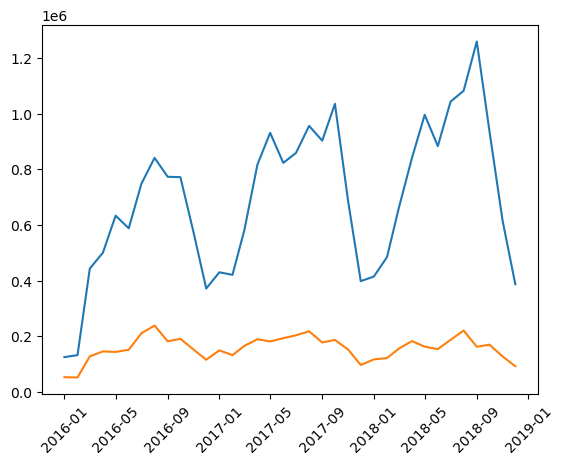

In [31]:
fig = plt.figure()
ax = fig.add_subplot()
ax.plot(monthly_revenue.index, monthly_revenue['LodgingRevenue'])
ax.plot(monthly_revenue.index, monthly_revenue['OtherRevenue'])
plt.xticks(rotation=45)  # rotate x axis labels
plt.show()